<a href="https://colab.research.google.com/github/smarta-dev/smarta_analytics/blob/main/Smarta_pred1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install drawtree

In [ ]:
pip install mpu

     |████████████████████████████████| 71kB 4.9MB/s 


In [ ]:
import mpu

In [ ]:
import numpy as np 
import pandas as pd 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from IPython.display import display, Image
import pydot
from sklearn import tree
from sklearn.tree import _tree
from sklearn import tree
import collections
import drawtree
from graphviz import Source

In [ ]:
datafile=pd.read_csv("apartment_listing.csv")
datafile

,FID,OBJECTID,TAX_ID,ADDRESSNUM,ADDRESSNAM,OWNERNAME1,OWNERNAME2,MAIL_ST_NB,STREET,CITY_STATE,ZIPCODE,YEARBLT,BLDG_STYLE,NOFIREPL,NOBEDS,FULL_BATHS,BSMNT_GAR,COM_YR_BLT,LAND_USE,LU_GROUP,FullAddres,Owner,Owner2,YearBuilt,LandUse,Neighborho,Zoning,Longitude,VALUE,Latitude,Occupancy
0,951,689668,3.115000e+25,617,Hiawatha Blvd E & Second,617 E Hiawatha LLC,,102,Newbury Hollow La,"Syracuse, NY",13210,0,,0,0,0,0,1920,Apartment,Residential,617 HIAWATHA BLVD E & SECOND,617 E HIAWATHA LLC,,1920,Apartment,Lakefront,IA,-76.1624,0,43.0771,Rental Occupied
1,2146,692133,3.115000e+25,947,Pond St,Syr Housing Authority,,516,Burt St,"Syracuse, NY",13202,0,,0,0,0,0,1973,Apartment,Residential,947 POND ST,SYR HOUSING AUTHORITY,,1973,Apartment,Northside,RB-1,-76.1482,1,43.0720,Rental Occupied
2,2645,693446,3.115000e+25,920-22,Townsend St N,Housing Visions Group LLC,,1201,E Fayette St,"Syracuse, NY",13210,0,,0,0,0,0,1910,Apartment,Residential,920-22 TOWNSEND ST N,HOUSING VISIONS GROUP LLC,,1910,Apartment,Northside,BA,-76.1514,0,43.0609,Rental Occupied
3,365,691135,3.115000e+25,1905,Court St,Pro Home CNY LLC,,74,Cherry Tree Cir,"Liverpool, NY",13090,1920,Old style,0,4,2,0,0,Two Family Residence,Residential,1905 COURT ST,PRO HOME CNY LLC,,1920,Two Family,Court-Woodlawn,RA,-76.1429,1,43.0806,Rental Occupied
4,427,690356,3.115000e+25,726,Lemoyne Ave,Lafata Angelo P,,88,Inglesid Lane,"Liverpool, NY",13090,1900,Old style,0,3,2,0,0,Two Family Residence,Residential,726 LEMOYNE AVE,LAFATA ANGELO P,,1900,Two Family,Washington Square,RA,-76.1593,1,43.0745,Rental Occupied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,41070,730596,3.115000e+25,303,Gere Ave,Afica LLC,,303,Gere Ave,"Syracuse, NY",13202,1900,Old style,0,4,2,0,0,Two Family Residence,Residential,303 GERE AVE,AFICA LLC,,1900,Two Family,Far Westside,RA-1,-76.1981,0,43.0581,Rental Occupied
1282,41081,730607,3.115000e+25,1107,Willis Ave & Gere Ave,Loveland Steven J,,128,Woodside Ln,"Liverpool, NY",13090,1890,Old style,0,4,2,0,0,Two Family Residence,Residential,1107 WILLIS AVE & GERE AVE,LOVELAND STEVEN J,,1890,Two Family,Far Westside,RA-1,-76.1965,1,43.0579,Rental Occupied
1283,41092,730618,3.115000e+25,1108-14,Avery Ave,Loveland Steven J,,128,Woodside Ln,"Liverpool, NY",13090,1900,Old style,0,4,2,0,0,Multiple Residences,Residential,1108-14 AVERY AVE,LOVELAND STEVEN J,,,Multiple Residence,Far Westside,RA-1,-76.1977,1,43.0573,Rental Occupied
1284,41144,730671,3.115000e+25,1220,Avery Ave,Murphy Keith,,19,Gulfline Rd,"Liverpool, NY",13090,1900,Bungalow,0,2,1,0,0,Single Family Residence,Residential,1220 AVERY AVE,MURPHY KEITH,,1900,Single Family,Far Westside,RA-1,-76.1988,1,43.0588,Rental Occupied


In [ ]:
working_file=datafile[['ZIPCODE','YEARBLT','NOFIREPL','NOBEDS','FULL_BATHS','BSMNT_GAR','VALUE']]
working_file

,ZIPCODE,YEARBLT,NOFIREPL,NOBEDS,FULL_BATHS,BSMNT_GAR,VALUE
0,13210,0,0,0,0,0,0
1,13202,0,0,0,0,0,1
2,13210,0,0,0,0,0,0
3,13090,1920,0,4,2,0,1
4,13090,1900,0,3,2,0,1
...,...,...,...,...,...,...,...
1281,13202,1900,0,4,2,0,0
1282,13090,1890,0,4,2,0,1
1283,13090,1900,0,4,2,0,1
1284,13090,1900,0,2,1,0,1


In [ ]:
def split(clean_table):

    X = clean_table.values[:, 0:6]
    Y = clean_table.values[:, 6] 

    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 100) 
      
    return X, Y, X_train, X_test, y_train, y_test

    

In [ ]:

def train(X_train, X_test, y_train): 
   
    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
    clf_gini.fit(X_train, y_train) 
    return clf_gini 

In [ ]:
def predict(X_test, clf_object): 
 
    y_pred = clf_object.predict(X_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

In [ ]:
def accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", confusion_matrix(y_test, y_pred)) 
    print ("Accuracy : ", accuracy_score(y_test,y_pred)*100) 
    print("Report : ", classification_report(y_test, y_pred)) 

In [ ]:
X, Y, X_train, X_test, y_train, y_test = split(working_file) 
print (X_test)

[[13210  1910     0     5     2     0]
 [13210  2010     0     6     4     0]
 [13202     0     0     0     0     0]
 ...
 [13210  1922     2     6     2     0]
 [13210  1910     0     6     3     0]
 [13210     0     0     0     0     0]]


In [ ]:
y_test

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,

In [ ]:
print(working_file.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1286 entries, 0 to 1285
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ZIPCODE     1286 non-null   int64
 1   YEARBLT     1286 non-null   int64
 2   NOFIREPL    1286 non-null   int64
 3   NOBEDS      1286 non-null   int64
 4   FULL_BATHS  1286 non-null   int64
 5   BSMNT_GAR   1286 non-null   int64
 6   VALUE       1286 non-null   int64
dtypes: int64(7)
memory usage: 70.5 KB
None


In [ ]:

clf_gini = train(X_train, X_test, y_train) 

print("Results Using Gini Index:") 
y = predict(X_test, clf_gini) 


Results Using Gini Index:
Predicted values:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
accuracy(y_test, y) 

Confusion Matrix:  [[  1 196]
 [  2 187]]
Accuracy :  48.704663212435236
Report :                precision    recall  f1-score   support

           0       0.33      0.01      0.01       197
           1       0.49      0.99      0.65       189

    accuracy                           0.49       386
   macro avg       0.41      0.50      0.33       386
weighted avg       0.41      0.49      0.33       386



In [ ]:
cols=['ZIPCODE', 'YEARBLT', 'NOFIREPL', 'NOBEDS',
       'FULL_BATHS', 'BSMNT_GAR']

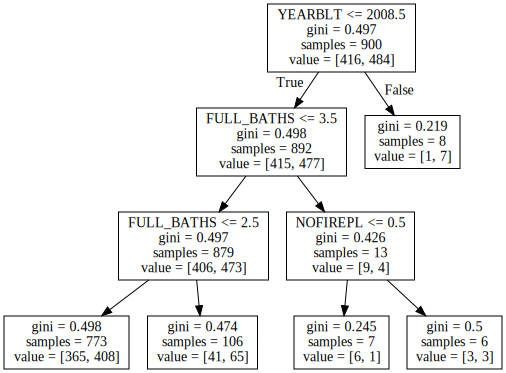

In [ ]:
    dot_data = tree.export_graphviz(clf_gini, out_file=None, feature_names=cols)
    pdot = pydot.graph_from_dot_data(dot_data)
    pdot[0].set_graph_defaults(size = "\"15,15\"")
    graph = Source(pdot[0].to_string())
    graph

In [ ]:
syr_lat=43.0392
syr_long=76.1351
dist = mpu.haversine_distance((syr_lat, syr_long), (syr_lat, syr_long))
print(dist)

0.0


In [ ]:
datafile.dropna()

,FID,OBJECTID,TAX_ID,ADDRESSNUM,ADDRESSNAM,OWNERNAME1,OWNERNAME2,MAIL_ST_NB,STREET,CITY_STATE,ZIPCODE,YEARBLT,BLDG_STYLE,NOFIREPL,NOBEDS,FULL_BATHS,BSMNT_GAR,COM_YR_BLT,LAND_USE,LU_GROUP,FullAddres,Owner,Owner2,YearBuilt,LandUse,Neighborho,Zoning,Longitude,VALUE,Latitude,Occupancy
0,951,689668,3.115000e+25,617,Hiawatha Blvd E & Second,617 E Hiawatha LLC,,102,Newbury Hollow La,"Syracuse, NY",13210,0,,0,0,0,0,1920,Apartment,Residential,617 HIAWATHA BLVD E & SECOND,617 E HIAWATHA LLC,,1920,Apartment,Lakefront,IA,-76.1624,0,43.0771,Rental Occupied
1,2146,692133,3.115000e+25,947,Pond St,Syr Housing Authority,,516,Burt St,"Syracuse, NY",13202,0,,0,0,0,0,1973,Apartment,Residential,947 POND ST,SYR HOUSING AUTHORITY,,1973,Apartment,Northside,RB-1,-76.1482,1,43.0720,Rental Occupied
2,2645,693446,3.115000e+25,920-22,Townsend St N,Housing Visions Group LLC,,1201,E Fayette St,"Syracuse, NY",13210,0,,0,0,0,0,1910,Apartment,Residential,920-22 TOWNSEND ST N,HOUSING VISIONS GROUP LLC,,1910,Apartment,Northside,BA,-76.1514,0,43.0609,Rental Occupied
3,365,691135,3.115000e+25,1905,Court St,Pro Home CNY LLC,,74,Cherry Tree Cir,"Liverpool, NY",13090,1920,Old style,0,4,2,0,0,Two Family Residence,Residential,1905 COURT ST,PRO HOME CNY LLC,,1920,Two Family,Court-Woodlawn,RA,-76.1429,1,43.0806,Rental Occupied
4,427,690356,3.115000e+25,726,Lemoyne Ave,Lafata Angelo P,,88,Inglesid Lane,"Liverpool, NY",13090,1900,Old style,0,3,2,0,0,Two Family Residence,Residential,726 LEMOYNE AVE,LAFATA ANGELO P,,1900,Two Family,Washington Square,RA,-76.1593,1,43.0745,Rental Occupied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,41070,730596,3.115000e+25,303,Gere Ave,Afica LLC,,303,Gere Ave,"Syracuse, NY",13202,1900,Old style,0,4,2,0,0,Two Family Residence,Residential,303 GERE AVE,AFICA LLC,,1900,Two Family,Far Westside,RA-1,-76.1981,0,43.0581,Rental Occupied
1282,41081,730607,3.115000e+25,1107,Willis Ave & Gere Ave,Loveland Steven J,,128,Woodside Ln,"Liverpool, NY",13090,1890,Old style,0,4,2,0,0,Two Family Residence,Residential,1107 WILLIS AVE & GERE AVE,LOVELAND STEVEN J,,1890,Two Family,Far Westside,RA-1,-76.1965,1,43.0579,Rental Occupied
1283,41092,730618,3.115000e+25,1108-14,Avery Ave,Loveland Steven J,,128,Woodside Ln,"Liverpool, NY",13090,1900,Old style,0,4,2,0,0,Multiple Residences,Residential,1108-14 AVERY AVE,LOVELAND STEVEN J,,,Multiple Residence,Far Westside,RA-1,-76.1977,1,43.0573,Rental Occupied
1284,41144,730671,3.115000e+25,1220,Avery Ave,Murphy Keith,,19,Gulfline Rd,"Liverpool, NY",13090,1900,Bungalow,0,2,1,0,0,Single Family Residence,Residential,1220 AVERY AVE,MURPHY KEITH,,1900,Single Family,Far Westside,RA-1,-76.1988,1,43.0588,Rental Occupied


In [ ]:
datafile["Syr_Latitude"]=syr_lat
datafile["Syr_Longitude"]=syr_long

In [ ]:
#datafile['college_distance']=mpu.haversine_distance((syr_lat, syr_long), (datafile['Latitude'], datafile['Longitude']))
#datafile

datafile["haversine_dist"] = datafile.apply(lambda x: mpu.haversine_distance((syr_lat, syr_long),(x["Latitude"], x["Longitude"])),axis=1)

In [ ]:
datafile

,FID,OBJECTID,TAX_ID,ADDRESSNUM,ADDRESSNAM,OWNERNAME1,OWNERNAME2,MAIL_ST_NB,STREET,CITY_STATE,ZIPCODE,YEARBLT,BLDG_STYLE,NOFIREPL,NOBEDS,FULL_BATHS,BSMNT_GAR,COM_YR_BLT,LAND_USE,LU_GROUP,FullAddres,Owner,Owner2,YearBuilt,LandUse,Neighborho,Zoning,Longitude,VALUE,Latitude,Occupancy,Syr_Latitude,Syr_Longitude,haversine_dist
0,951,689668,3.115000e+25,617,Hiawatha Blvd E & Second,617 E Hiawatha LLC,,102,Newbury Hollow La,"Syracuse, NY",13210,0,,0,0,0,0,1920,Apartment,Residential,617 HIAWATHA BLVD E & SECOND,617 E HIAWATHA LLC,,1920,Apartment,Lakefront,IA,-76.1624,0,43.0771,Rental Occupied,43.0392,76.1351,10049.185993
1,2146,692133,3.115000e+25,947,Pond St,Syr Housing Authority,,516,Burt St,"Syracuse, NY",13202,0,,0,0,0,0,1973,Apartment,Residential,947 POND ST,SYR HOUSING AUTHORITY,,1973,Apartment,Northside,RB-1,-76.1482,1,43.0720,Rental Occupied,43.0392,76.1351,10049.327340
2,2645,693446,3.115000e+25,920-22,Townsend St N,Housing Visions Group LLC,,1201,E Fayette St,"Syracuse, NY",13210,0,,0,0,0,0,1910,Apartment,Residential,920-22 TOWNSEND ST N,HOUSING VISIONS GROUP LLC,,1910,Apartment,Northside,BA,-76.1514,0,43.0609,Rental Occupied,43.0392,76.1351,10050.576470
3,365,691135,3.115000e+25,1905,Court St,Pro Home CNY LLC,,74,Cherry Tree Cir,"Liverpool, NY",13090,1920,Old style,0,4,2,0,0,Two Family Residence,Residential,1905 COURT ST,PRO HOME CNY LLC,,1920,Two Family,Court-Woodlawn,RA,-76.1429,1,43.0806,Rental Occupied,43.0392,76.1351,10048.281674
4,427,690356,3.115000e+25,726,Lemoyne Ave,Lafata Angelo P,,88,Inglesid Lane,"Liverpool, NY",13090,1900,Old style,0,3,2,0,0,Two Family Residence,Residential,726 LEMOYNE AVE,LAFATA ANGELO P,,1900,Two Family,Washington Square,RA,-76.1593,1,43.0745,Rental Occupied,43.0392,76.1351,10049.372339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281,41070,730596,3.115000e+25,303,Gere Ave,Afica LLC,,303,Gere Ave,"Syracuse, NY",13202,1900,Old style,0,4,2,0,0,Two Family Residence,Residential,303 GERE AVE,AFICA LLC,,1900,Two Family,Far Westside,RA-1,-76.1981,0,43.0581,Rental Occupied,43.0392,76.1351,10052.157948
1282,41081,730607,3.115000e+25,1107,Willis Ave & Gere Ave,Loveland Steven J,,128,Woodside Ln,"Liverpool, NY",13090,1890,Old style,0,4,2,0,0,Two Family Residence,Residential,1107 WILLIS AVE & GERE AVE,LOVELAND STEVEN J,,1890,Two Family,Far Westside,RA-1,-76.1965,1,43.0579,Rental Occupied,43.0392,76.1351,10052.134749
1283,41092,730618,3.115000e+25,1108-14,Avery Ave,Loveland Steven J,,128,Woodside Ln,"Liverpool, NY",13090,1900,Old style,0,4,2,0,0,Multiple Residences,Residential,1108-14 AVERY AVE,LOVELAND STEVEN J,,,Multiple Residence,Far Westside,RA-1,-76.1977,1,43.0573,Rental Occupied,43.0392,76.1351,10052.230595
1284,41144,730671,3.115000e+25,1220,Avery Ave,Murphy Keith,,19,Gulfline Rd,"Liverpool, NY",13090,1900,Bungalow,0,2,1,0,0,Single Family Residence,Residential,1220 AVERY AVE,MURPHY KEITH,,1900,Single Family,Far Westside,RA-1,-76.1988,1,43.0588,Rental Occupied,43.0392,76.1351,10052.104033


In [ ]:
working_file2=datafile[['ZIPCODE','YEARBLT','NOFIREPL','NOBEDS','FULL_BATHS','BSMNT_GAR','VALUE','haversine_dist']]
working_file2

,ZIPCODE,YEARBLT,NOFIREPL,NOBEDS,FULL_BATHS,BSMNT_GAR,VALUE,haversine_dist
0,13210,0,0,0,0,0,0,10049.185993
1,13202,0,0,0,0,0,1,10049.327340
2,13210,0,0,0,0,0,0,10050.576470
3,13090,1920,0,4,2,0,1,10048.281674
4,13090,1900,0,3,2,0,1,10049.372339
...,...,...,...,...,...,...,...,...
1281,13202,1900,0,4,2,0,0,10052.157948
1282,13090,1890,0,4,2,0,1,10052.134749
1283,13090,1900,0,4,2,0,1,10052.230595
1284,13090,1900,0,2,1,0,1,10052.104033
